## Esmeralda Event Display

### GD/ JAH   17/10/19

In [1]:
import time
print(time.asctime())

Thu Nov  7 15:13:41 2019


In [2]:
%load_ext autoreload
%autoreload 2

import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt
import utils             as ut

to_df = pd.DataFrame.from_records

In [3]:
#datadir  = "/home/jrenner/analysis/7431/hdf5/JJ_maps_100_7430_7433/ntuple/trigger2"
#filename = "/ntuple_9040_7431_trigger2_v1.1.0_20190801_bg.h5"

run_number = 7430 
idatadir   = f"/home/hernando/ICAROSNB/JAH/esmes"
ifile      = f"/esmeralda_{run_number}_dspsel_script.h5"

In [4]:
f = tb.open_file(idatadir + ifile, 'r')
print(f)

/home/hernando/ICAROSNB/JAH/esmes/esmeralda_7430_dspsel_script.h5 (File) ''
Last modif.: 'Fri Oct 18 16:07:24 2019'
Object Tree: 
/ (RootGroup) ''
/PAOLINA (Group) ''
/PAOLINA/Events (Table(519200,), shuffle, zlib(4)) 'Hits'
/PAOLINA/Summary (Table(2399,), shuffle, zlib(4)) 'Event summary information'
/PAOLINA/Tracks (Table(2399,), shuffle, zlib(4)) 'Track information'
/RECO (Group) ''
/RECO/Events (Table(1871723,), shuffle, zlib(4)) 'Hits'
/Run (Group) ''
/Run/events (Table(2399,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(2399,), shuffle, zlib(4)) 'run info table'



In [5]:
runevt = to_df(f.root.Run.events.read())
runevt[:10]
#print(len(runevt))
evtnumbers = runevt['evt_number'].values
np.random.shuffle(evtnumbers)

## Paolina

In [6]:
plina_evts = to_df(f.root.PAOLINA.Events.read())
labels = list(plina_evts.columns)
print(labels)

['event', 'time', 'npeak', 'Xpeak', 'Ypeak', 'nsipm', 'X', 'Y', 'Xrms', 'Yrms', 'Z', 'Q', 'E', 'Qc', 'Ec', 'track_id']


In [7]:
plina_summ = to_df(f.root.PAOLINA.Summary.read())
labels = list(plina_summ.columns)
print(labels)

['event', 'time', 'S1e', 'S1t', 'nS2', 'ntrks', 'nhits', 'S2e0', 'S2ec', 'S2q0', 'S2qc', 'x_avg', 'y_avg', 'z_avg', 'r_avg', 'x_min', 'y_min', 'z_min', 'r_min', 'x_max', 'y_max', 'z_max', 'r_max']


In [8]:
def inspect(df):
    labels = list(df.columns)
    print(labels)
    for label in labels:
        hist(df[label], title = label)
    return

In [33]:
dftracks = to_df(f.root.PAOLINA.Tracks.read())
labels = list(dftracks.columns)
print(labels)

['event', 'trackID', 'energy', 'length', 'numb_of_voxels', 'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y', 'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y', 'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x', 'vox_size_y', 'vox_size_z']


In [34]:
dftracks['dz'] = dftracks.z_max - dftracks.z_min

In [35]:
dftracks['fb1'] = (dftracks.blob1_z - dftracks.z_min)/dftracks.dz
dftracks['fb2'] = (dftracks.blob2_z - dftracks.z_min)/dftracks.dz

In [36]:
sel = (dftracks.fb1 < 0.2) & (dftracks.fb2 > 0.8) & (dftracks.dz > 67) & (dftracks.dz < 72.)
np.sum(sel)

55

In [37]:
dftracks2 = dftracks.groupby('event')

In [50]:
evts = iter(dftracks[sel].event.values)

In [51]:
reco = to_df(f.root.RECO.Events.read())
labels = list(plina_summ.columns)
print(labels)

['event', 'time', 'S1e', 'S1t', 'nS2', 'ntrks', 'nhits', 'S2e0', 'S2ec', 'S2q0', 'S2qc', 'x_avg', 'y_avg', 'z_avg', 'r_avg', 'x_min', 'y_min', 'z_min', 'r_min', 'x_max', 'y_max', 'z_max', 'r_max']


In [52]:
dfhits = reco.groupby('event')

## RECO

In [79]:
evt = next(evts)
print(evt)

1343408


event  :  [1343408]
trackID  :  [0]
energy  :  [1.6365654]
length  :  [93.42416793]
numb_of_voxels  :  [56]
numb_of_hits  :  [174]
numb_of_tracks  :  [1]
x_min  :  [-135.]
y_min  :  [55.]
z_min  :  [35.6790625]
x_max  :  [-65.]
y_max  :  [115.]
z_max  :  [103.117625]
r_max  :  [154.43445211]
x_ave  :  [-102.71438508]
y_ave  :  [80.51657107]
z_ave  :  [65.7625054]
extreme1_x  :  [-120.]
extreme1_y  :  [60.]
extreme1_z  :  [39.39834375]
extreme2_x  :  [-80.]
extreme2_y  :  [110.]
extreme2_z  :  [99.39834375]
blob1_x  :  [-125.]
blob1_y  :  [55.]
blob1_z  :  [37.97948228]
blob2_x  :  [-75.]
blob2_y  :  [115.]
blob2_z  :  [99.63543617]
eblob1  :  [0.42461116]
eblob2  :  [0.22825605]
ovlp_blob_energy  :  [0.]
vox_size_x  :  [10.]
vox_size_y  :  [10.]
vox_size_z  :  [10.]
dz  :  [67.4385625]
fb1  :  [0.03411134]
fb2  :  [0.94836502]


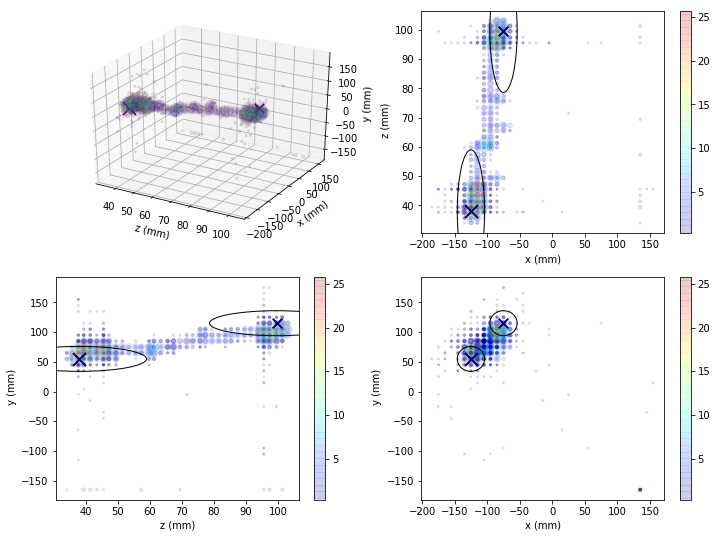

In [80]:
ut.esmeralda_event_display(evt, dftracks2, dfhits)

### ----

In [64]:
it = iter(cc)

In [92]:
evt, ci = next(it)
print(evt)

699707


1647.0821159221468

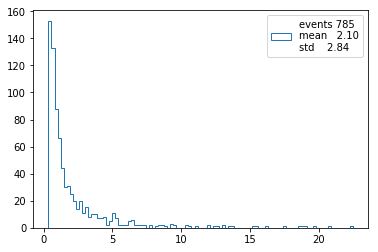

In [93]:
Ec = 1000.*ci['Ec'].values
ut.hist(Ec);
np.sum(Ec)

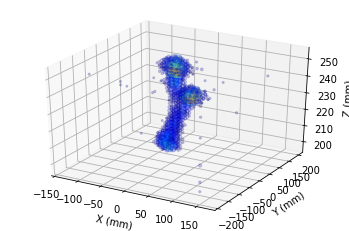

In [94]:
x, y, z, ene, q = ut.xyze_qsel(ci, q0 = 0.)
ut.plot_track(x, y, z, ene)

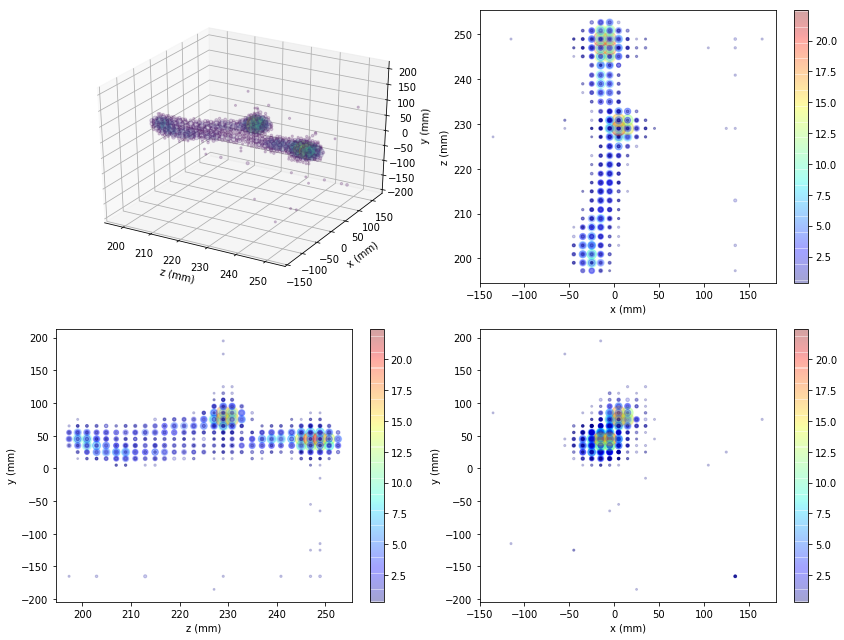

In [98]:
x, y, z, ene, q = ut.xyze_qsel(ci, q0 = 0.)
ut.graph_event(x, y, z, ene);

In [115]:
icct = cct.get_group(evt)

In [119]:
print(icct.extreme1_z, icct.extreme2_z)

4    199.946969
Name: extreme1_z, dtype: float64 4    229.946969
Name: extreme2_z, dtype: float64
